In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv('/content/car_evaluation.csv')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [ ]:
df.columns = col_names

In [ ]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
df['class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [ ]:
df['doors'].value_counts()

3        432
5more    432
4        432
2        431
Name: doors, dtype: int64

In [ ]:
df['persons'].value_counts()

more    576
4       576
2       575
Name: persons, dtype: int64

In [ ]:
df['maint'].value_counts()

high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64

In [ ]:
df['lug_boot'].value_counts()

big      576
med      576
small    575
Name: lug_boot, dtype: int64

In [ ]:
df['safety'].value_counts()

high    576
med     576
low     575
Name: safety, dtype: int64

In [ ]:
df['class'] = df['class'].replace({'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3})

In [ ]:
df_copy = pd.get_dummies(df)

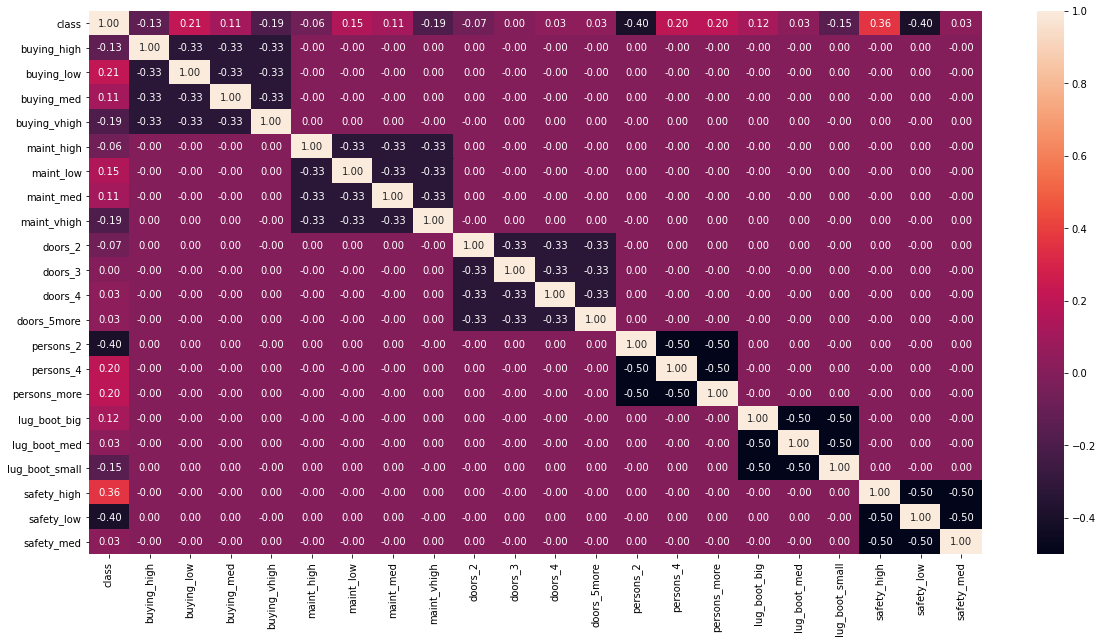

In [ ]:
plt.figure(figsize=(20,10))

sns.heatmap(df_copy.corr(), annot=True, fmt='.2f')

In [ ]:
y = df['class']
X = df.drop(['class'], axis=1)

In [ ]:
X = pd.get_dummies(X)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier as dtree

In [ ]:
ctree = dtree()

In [ ]:
from sklearn import tree

In [ ]:
ctree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(697.5, 498.3, 'X[12] <= 0.5\ngini = 0.457\nsamples = 1381\nvalue = [967, 307, 55, 52]'),
 Text(627.75, 407.70000000000005, 'X[19] <= 0.5\ngini = 0.581\nsamples = 916\nvalue = [502, 307, 55, 52]'),
 Text(558.0, 317.1, 'X[7] <= 0.5\ngini = 0.629\nsamples = 618\nvalue = [204, 307, 55, 52]'),
 Text(279.0, 226.5, 'X[1] <= 0.5\ngini = 0.626\nsamples = 466\nvalue = [105, 254, 55, 52]'),
 Text(139.5, 135.89999999999998, 'X[17] <= 0.5\ngini = 0.554\nsamples = 354\nvalue = [100, 212, 19, 23]'),
 Text(69.75, 45.299999999999955, 'gini = 0.511\nsamples = 237\nvalue = [42, 158, 14, 23]'),
 Text(209.25, 45.299999999999955, 'gini = 0.539\nsamples = 117\nvalue = [58, 54, 5, 0]'),
 Text(418.5, 135.89999999999998, 'X[20] <= 0.5\ngini = 0.687\nsamples = 112\nvalue = [5, 42, 36, 29]'),
 Text(348.75, 45.299999999999955, 'gini = 0.611\nsamples = 54\nvalue = [2, 8, 15, 29]'),
 Text(488.25, 45.299999999999955, 'gini = 0.523\nsamples = 58\nvalue = [3, 34, 21, 0]'),
 Text(837.0, 226.5, 'X[1] <= 0.5\ngini =

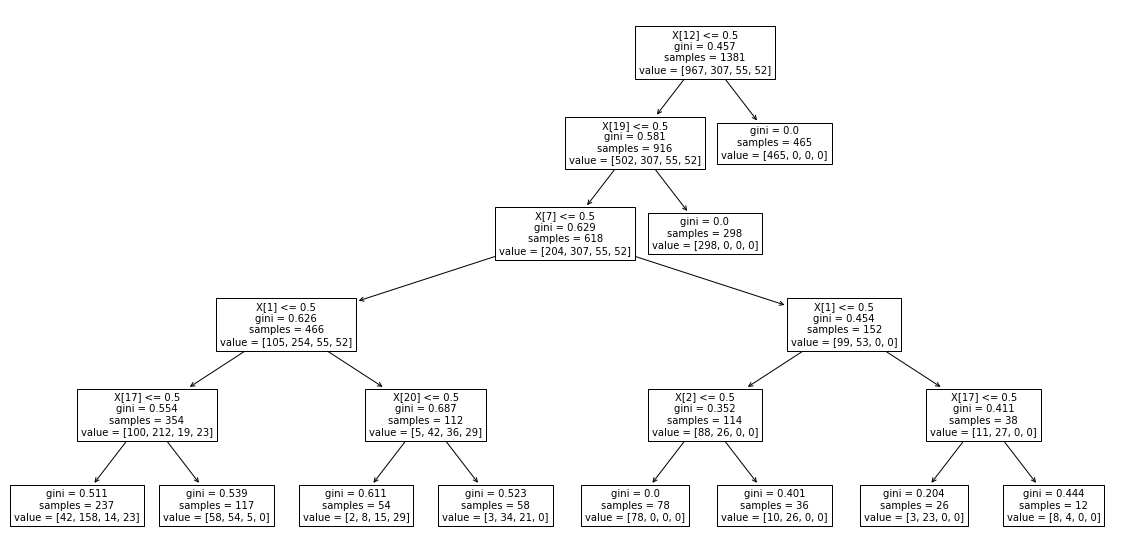

In [ ]:
plt.figure(figsize=(20, 10))

tree.plot_tree(ctree.fit(x_train, y_train))

In [ ]:
preds = ctree.predict(x_test)
sum(preds == y_test)/len(preds)

0.9595375722543352

In [ ]:
preds = ctree.predict(x_train)
sum(preds == y_train)/len(preds)

1.0